In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "C:/Users/TPNml/Downloads/what's cookin 2.wav"
y, sr = librosa.load(filename)
stream = librosa.stream(filename,
                      block_length=256,
                      frame_length=4096,
                      hop_length=1024)
D_block = np.abs(librosa.stft(y, hop_length=64))
#for y_block in stream:
#    D_block = np.abs(librosa.stft(y_block, center=False))
print(type(y))

<class 'numpy.ndarray'>


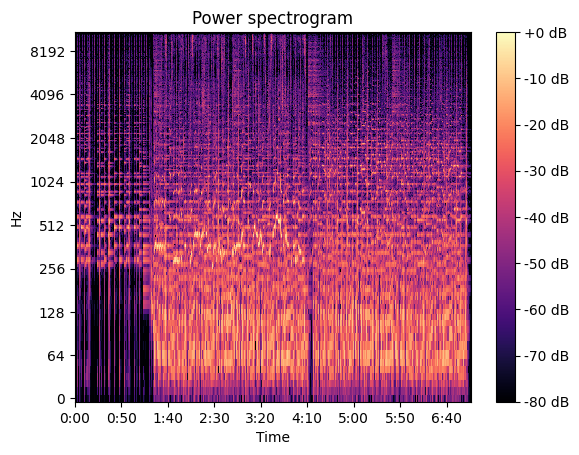

In [23]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(D_block,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
def spec_bandwidth(filepath):
    y, sr = librosa.load(filepath)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                        fmax=20000)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='log Power spectrogram')
    ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                    np.minimum(centroid[0] + spec_bw[0], sr/2),
                    alpha=0.5, label='Centroid +- bandwidth')
    ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
    ax[1].legend(loc='lower right')

In [ ]:
spec_bandwidth("C:/Users/TPNml/Downloads/what's cookin 2.wav")
spec_bandwidth("C:/Users/TPNml/Downloads/FinalCompleteA.wav")

In [2]:
# https://stackoverflow.com/questions/59056786/python-librosa-with-microphone-input
import numpy as np
import pyaudio
import time
import librosa

class AudioHandler(object):
    def __init__(self):
        self.FORMAT = pyaudio.paFloat32
        self.CHANNELS = 1
        self.RATE = 44100
        self.CHUNK = 1024 * 2
        self.p = None
        self.stream = None

    def start(self):
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(format=self.FORMAT,
                                  channels=self.CHANNELS,
                                  rate=self.RATE,
                                  input=True,
                                  output=False,
                                  stream_callback=self.callback,
                                  frames_per_buffer=self.CHUNK)

    def stop(self):
        self.stream.close()
        self.p.terminate()

    def callback(self, in_data, frame_count, time_info, flag):
        numpy_array = np.frombuffer(in_data, dtype=np.float32)
        print(np.abs(librosa.stft(numpy_array, hop_length=64)))
        return None, pyaudio.paContinue

    def mainloop(self):
        while (self.stream.is_active()): # if using button you can set self.stream to 0 (self.stream = 0), otherwise you can use a stop condition
            time.sleep(2.0)


audio = AudioHandler()
audio.start()     # open the the stream
audio.mainloop()  # main operations with librosa
audio.stop()

[[2.5412501e-04 2.6570808e-04 2.7458798e-04 ... 2.6965307e-04
  2.7444458e-04 2.7691288e-04]
 [2.4946945e-04 2.6381799e-04 2.7126676e-04 ... 3.4889762e-04
  3.5295574e-04 3.4646888e-04]
 [2.1348365e-04 2.3342104e-04 2.5105858e-04 ... 4.9693376e-04
  4.6578684e-04 4.3047729e-04]
 ...
 [2.8003444e-04 3.1520150e-04 3.4686178e-04 ... 5.1107066e-04
  4.5589931e-04 4.0169520e-04]
 [2.3137183e-04 2.6924629e-04 3.0449900e-04 ... 2.5942715e-04
  2.3649793e-04 2.1587775e-04]
 [1.8907113e-04 2.2812118e-04 2.6552749e-04 ... 9.5441006e-05
  1.0793820e-04 1.1054091e-04]]
[[1.3391675e-04 1.5547662e-04 1.7791548e-04 ... 1.7292390e-04
  1.6318168e-04 1.5071007e-04]
 [6.3916392e-05 3.3798435e-05 1.7151286e-05 ... 1.3828839e-04
  1.4043201e-04 1.4071412e-04]
 [2.3438552e-04 2.5740854e-04 2.8227014e-04 ... 1.8915941e-04
  1.9139414e-04 1.8866538e-04]
 ...
 [2.6791479e-04 2.7210586e-04 2.7350549e-04 ... 2.5186106e-04
  2.0502697e-04 1.6394195e-04]
 [4.2111435e-04 4.3772790e-04 4.4802029e-04 ... 2.8398479e-

[[6.6822677e+00 7.4409909e+00 8.1605225e+00 ... 7.7394691e+00
  6.9856076e+00 6.2074819e+00]
 [5.4642916e+00 5.9193654e+00 6.3028655e+00 ... 5.9698095e+00
  5.5440617e+00 5.0617509e+00]
 [2.9853482e+00 2.9665730e+00 2.8754845e+00 ... 2.6111703e+00
  2.6744485e+00 2.6723697e+00]
 ...
 [6.7891362e-03 6.6843121e-03 6.4410078e-03 ... 3.4357195e-03
  3.5344919e-03 3.5787653e-03]
 [6.8204161e-03 6.6764997e-03 6.4055054e-03 ... 3.5686935e-03
  3.6599911e-03 3.6756899e-03]
 [7.4586370e-03 7.5504920e-03 7.5149215e-03 ... 3.3502989e-03
  3.4871614e-03 3.5624406e-03]]
[[5.4611053e+00 6.2415667e+00 7.0381389e+00 ... 4.8295403e+00
  4.1972113e+00 3.6038074e+00]
 [4.3497863e+00 4.8118429e+00 5.2393069e+00 ... 3.5001349e+00
  3.1491380e+00 2.7943454e+00]
 [2.0766885e+00 2.0269258e+00 1.9121441e+00 ... 1.0084813e+00
  1.0850259e+00 1.1294167e+00]
 ...
 [5.4949843e-03 5.5730683e-03 5.5490816e-03 ... 1.5201406e-03
  1.6735204e-03 1.8078635e-03]
 [5.2410671e-03 5.2328873e-03 5.1336535e-03 ... 2.1989576e-

[[1.3563088e+00 1.4146447e+00 1.4514965e+00 ... 2.5335879e+00
  2.3604980e+00 2.1614952e+00]
 [1.5191051e+00 1.5379475e+00 1.5207763e+00 ... 2.1976278e+00
  2.0721896e+00 1.9127827e+00]
 [2.0226142e+00 2.1511974e+00 2.2395248e+00 ... 1.4529252e+00
  1.3804703e+00 1.2871450e+00]
 ...
 [2.7149755e-03 2.6590785e-03 2.5831119e-03 ... 1.8540609e-03
  1.8213390e-03 1.7432295e-03]
 [3.6612449e-03 3.6390773e-03 3.5213518e-03 ... 1.6098451e-03
  1.5543698e-03 1.5012198e-03]
 [4.1450765e-03 4.2656828e-03 4.3471023e-03 ... 5.4424419e-04
  7.3180028e-04 8.7234180e-04]]
[[4.3974882e-01 5.2425289e-01 6.2694365e-01 ... 5.3732103e-01
  5.1454222e-01 4.8120055e-01]
 [7.2484422e-01 7.5236106e-01 7.5321198e-01 ... 4.5995232e-01
  4.3686277e-01 4.0981606e-01]
 [1.5231339e+00 1.6283541e+00 1.7004118e+00 ... 3.2098326e-01
  2.6131895e-01 1.9647858e-01]
 ...
 [3.1318653e-03 3.3593532e-03 3.5521213e-03 ... 4.8186327e-03
  4.9937423e-03 5.0536841e-03]
 [2.0818715e-03 2.1367590e-03 2.1635841e-03 ... 4.2519355e-

[[2.7712482e-01 2.6859030e-01 2.5069663e-01 ... 7.7999473e-01
  7.8610706e-01 7.7354515e-01]
 [3.2281503e-01 3.4050891e-01 3.5497496e-01 ... 8.9059240e-01
  8.6234379e-01 8.1960183e-01]
 [3.1004408e-01 3.3907825e-01 3.6453909e-01 ... 9.0906626e-01
  8.5162455e-01 7.8342658e-01]
 ...
 [1.6902304e-03 1.7301112e-03 1.7384697e-03 ... 1.9367073e-03
  1.7784568e-03 1.6068375e-03]
 [1.2596879e-03 1.3860298e-03 1.5121329e-03 ... 1.6587793e-03
  1.5720821e-03 1.4787029e-03]
 [9.2693124e-05 1.1528707e-04 3.4270188e-04 ... 2.2332283e-04
  4.1625724e-04 5.8297714e-04]]
[[0.54985815 0.5572539  0.5445296  ... 1.3986402  1.3292594  1.2306267 ]
 [0.50728726 0.5332925  0.55841655 ... 1.2802086  1.1915061  1.0907699 ]
 [0.37792078 0.36834264 0.34913278 ... 0.84836555 0.7879844  0.7243479 ]
 ...
 [0.00193405 0.0018953  0.00180607 ... 0.00286691 0.00284792 0.00277881]
 [0.00179014 0.00178302 0.00175305 ... 0.00340791 0.00337102 0.00327519]
 [0.00183119 0.00181385 0.00175152 ... 0.00350168 0.00349865 0.003

[[8.4598774e-01 9.7540218e-01 1.0950826e+00 ... 1.2479920e+00
  1.0159272e+00 7.9873079e-01]
 [7.5209868e-01 8.7340838e-01 9.8824990e-01 ... 1.0969703e+00
  9.0438169e-01 7.2421581e-01]
 [5.5162168e-01 6.5886652e-01 7.6304728e-01 ... 6.4327133e-01
  5.3959680e-01 4.4832602e-01]
 ...
 [1.5820219e-03 1.6601509e-03 1.7347364e-03 ... 2.8534494e-03
  2.8357024e-03 2.7712649e-03]
 [8.9329499e-04 7.8813807e-04 6.4497220e-04 ... 2.8221442e-03
  2.8228920e-03 2.7817357e-03]
 [1.0044668e-03 1.0738766e-03 1.1488107e-03 ... 2.1833437e-03
  2.3409089e-03 2.4380616e-03]]
[[0.15195672 0.20327018 0.27009195 ... 1.6231472  1.6983856  1.7345135 ]
 [0.13300219 0.07375779 0.05663049 ... 1.945665   1.9671862  1.9546969 ]
 [0.4460508  0.52393806 0.6168936  ... 2.3964605  2.3937945  2.3444023 ]
 ...
 [0.0026937  0.00290276 0.00306731 ... 0.00467598 0.00499092 0.00519938]
 [0.00300385 0.00313645 0.00321738 ... 0.00545366 0.00565647 0.00575862]
 [0.00297108 0.00302909 0.00301789 ... 0.00687784 0.00683874 0.006

[[5.1005000e-01 5.3156590e-01 5.7440674e-01 ... 3.5816655e-01
  3.7747762e-01 3.4684601e-01]
 [8.3772105e-01 9.2139679e-01 9.7261584e-01 ... 4.2821220e-01
  5.0429404e-01 5.7752556e-01]
 [1.4788212e+00 1.7218225e+00 1.9336239e+00 ... 2.6563570e+00
  2.4881639e+00 2.2836692e+00]
 ...
 [7.0560089e-04 6.9806463e-04 6.7925884e-04 ... 2.0357887e-03
  2.2125170e-03 2.3483373e-03]
 [1.2425308e-03 1.2969290e-03 1.3367177e-03 ... 3.3684995e-03
  3.4190014e-03 3.4051405e-03]
 [1.4678556e-03 1.5406746e-03 1.5822503e-03 ... 4.4845771e-03
  4.3515293e-03 4.1672480e-03]]
[[0.08822246 0.03085038 0.06021474 ... 0.8012445  0.76226634 0.71026546]
 [0.25759703 0.30778766 0.38423592 ... 0.75707906 0.81020707 0.84543175]
 [0.34522685 0.38487393 0.40801024 ... 1.6449357  1.5599656  1.4443719 ]
 ...
 [0.00316119 0.0030706  0.00291321 ... 0.00215321 0.00225652 0.0023165 ]
 [0.00398584 0.00397773 0.00389724 ... 0.00199237 0.00207387 0.00211401]
 [0.00473483 0.00493121 0.00506054 ... 0.00203771 0.00210246 0.002

[[1.8445649e+00 1.9359102e+00 1.9999831e+00 ... 1.1413188e-01
  2.0537040e-01 2.8253633e-01]
 [1.7062536e+00 1.7541220e+00 1.7660133e+00 ... 7.8329051e-01
  7.2164977e-01 6.5872258e-01]
 [1.5493492e+00 1.5704576e+00 1.5596585e+00 ... 1.0905815e+00
  9.9365014e-01 8.8994271e-01]
 ...
 [3.0691277e-03 3.1397510e-03 3.1708914e-03 ... 7.3439698e-04
  6.5256289e-04 5.6021160e-04]
 [2.4084602e-03 2.4376365e-03 2.4291230e-03 ... 4.7282418e-04
  3.7623517e-04 2.9276186e-04]
 [1.4226137e-03 1.2301210e-03 1.0119881e-03 ... 3.1737116e-04
  2.1469648e-04 1.3051301e-04]]
[[8.3481574e-01 8.9882588e-01 9.3562454e-01 ... 2.5686178e-01
  2.3221034e-01 2.1909527e-01]
 [7.2952437e-01 8.0517548e-01 8.7739712e-01 ... 1.9445294e-01
  2.3505145e-01 2.5478202e-01]
 [4.3554512e-01 4.8618573e-01 5.4416025e-01 ... 4.5051178e-01
  4.1102916e-01 3.7974605e-01]
 ...
 [2.0510631e-03 2.1892798e-03 2.2963176e-03 ... 1.0157009e-03
  9.8575710e-04 9.4373320e-04]
 [1.4001600e-03 1.4803248e-03 1.5512831e-03 ... 1.3990768e-

[[2.6374131e-01 1.7568889e-01 5.7873603e-02 ... 4.5757097e-01
  3.5429966e-01 2.6927933e-01]
 [5.7397377e-01 6.4871752e-01 7.3847568e-01 ... 3.3946809e-01
  2.6323864e-01 2.0199910e-01]
 [6.7438120e-01 7.4285102e-01 8.0200195e-01 ... 1.3203789e-01
  9.5340431e-02 7.4987352e-02]
 ...
 [1.3721305e-03 1.2718301e-03 1.1374112e-03 ... 2.4371070e-03
  2.3455580e-03 2.2242323e-03]
 [1.9548894e-03 1.9430843e-03 1.9068980e-03 ... 1.5848614e-03
  1.5600848e-03 1.5145863e-03]
 [2.3916003e-03 2.4779057e-03 2.5208844e-03 ... 4.2457366e-04
  5.7180389e-04 7.0492015e-04]]
[[8.0396891e-01 9.2010653e-01 1.0318217e+00 ... 3.9143342e-01
  3.0227590e-01 2.1844967e-01]
 [6.8668145e-01 7.7894986e-01 8.6466855e-01 ... 4.3607756e-01
  3.4285125e-01 2.5476587e-01]
 [4.3439293e-01 4.8125470e-01 5.2118123e-01 ... 5.9551406e-01
  5.1103663e-01 4.2770049e-01]
 ...
 [9.1352622e-04 1.0143765e-03 1.1053593e-03 ... 3.9846860e-03
  3.9310153e-03 3.8037745e-03]
 [6.7521370e-04 6.8922871e-04 6.8196689e-04 ... 3.4738404e-

[[5.47399402e-01 3.92665416e-01 2.77209163e-01 ... 3.09542871e+00
  3.31765795e+00 3.43667459e+00]
 [1.62491548e+00 1.70704877e+00 1.73300409e+00 ... 5.16871357e+00
  5.21953917e+00 5.20147514e+00]
 [2.06974125e+00 2.26585913e+00 2.50227380e+00 ... 1.01130047e+01
  9.64285851e+00 8.99154186e+00]
 ...
 [7.25573208e-03 7.29184132e-03 7.20532751e-03 ... 1.10101243e-02
  1.14605874e-02 1.16780354e-02]
 [6.65590912e-03 6.51460048e-03 6.22936571e-03 ... 1.15906885e-02
  1.19466698e-02 1.20764440e-02]
 [6.48380909e-03 6.43853284e-03 6.28855033e-03 ... 1.26455473e-02
  1.28231319e-02 1.27697336e-02]]
[[1.3175672e+00 1.0277294e+00 7.1420968e-01 ... 2.2364287e+00
  2.3041329e+00 2.2779732e+00]
 [2.9382861e+00 2.9870822e+00 3.0001905e+00 ... 2.3533785e+00
  2.3167796e+00 2.2848666e+00]
 [5.6214023e+00 5.7022858e+00 5.6772814e+00 ... 3.1402037e+00
  3.2396398e+00 3.2202342e+00]
 ...
 [1.2873880e-02 1.2845326e-02 1.2565494e-02 ... 1.8924978e-03
  1.9102413e-03 1.9094263e-03]
 [1.2518242e-02 1.24029

[[8.3531612e-01 7.6847649e-01 6.6425842e-01 ... 1.3960308e+00
  1.3160595e+00 1.2103660e+00]
 [1.1062121e+00 1.1896946e+00 1.2706485e+00 ... 1.2777342e+00
  1.1819307e+00 1.0725882e+00]
 [1.2012302e+00 1.3238493e+00 1.4349499e+00 ... 8.4378242e-01
  7.5670886e-01 6.7055106e-01]
 ...
 [3.4745673e-03 3.5099296e-03 3.4975747e-03 ... 5.7328813e-04
  6.5997790e-04 7.0624321e-04]
 [3.3509755e-03 3.3896016e-03 3.3634920e-03 ... 1.3792310e-03
  1.2938824e-03 1.2104096e-03]
 [2.9347995e-03 2.8146207e-03 2.6370201e-03 ... 1.9994990e-03
  1.7873268e-03 1.5681069e-03]]
[[6.5211737e-01 6.4557368e-01 6.0745800e-01 ... 6.4576763e-01
  6.8210357e-01 6.9741523e-01]
 [7.9515171e-01 8.8308638e-01 9.6830153e-01 ... 9.1150510e-01
  8.8107258e-01 8.3929867e-01]
 [9.4125473e-01 1.1093439e+00 1.2799394e+00 ... 1.0857208e+00
  1.0160459e+00 9.3271458e-01]
 ...
 [1.0764833e-03 1.1071262e-03 1.1518211e-03 ... 8.6662208e-04
  7.7322940e-04 6.7522377e-04]
 [7.2030659e-04 6.6547544e-04 6.1917584e-04 ... 6.2182639e-

[[4.3190795e-01 4.6374470e-01 4.5301193e-01 ... 1.0124290e+00
  9.3314505e-01 8.4196025e-01]
 [2.0478681e-01 2.9580531e-01 3.8685131e-01 ... 7.1964568e-01
  7.4523634e-01 7.6322687e-01]
 [6.8391144e-01 7.8662109e-01 9.2504513e-01 ... 9.5273352e-01
  9.3441170e-01 8.8870502e-01]
 ...
 [1.5645513e-03 1.6983432e-03 1.8078089e-03 ... 1.7143658e-03
  1.5821254e-03 1.4829546e-03]
 [9.7879011e-04 1.0701059e-03 1.1541818e-03 ... 9.2806946e-04
  8.1474590e-04 7.7817863e-04]
 [1.5650448e-04 2.8774113e-04 4.2228683e-04 ... 2.1003599e-03
  1.9419088e-03 1.7651703e-03]]
[[5.6922066e-01 4.8807880e-01 3.6796290e-01 ... 9.6318185e-01
  9.1622341e-01 8.5699481e-01]
 [7.9281408e-01 8.5440463e-01 9.2869860e-01 ... 9.9901628e-01
  9.3071961e-01 8.4274405e-01]
 [9.1643769e-01 9.0519583e-01 8.6429441e-01 ... 9.5714009e-01
  8.3971703e-01 7.1579832e-01]
 ...
 [3.0552731e-03 3.1231828e-03 3.1512307e-03 ... 2.1867792e-03
  2.0136461e-03 1.8187790e-03]
 [2.5147423e-03 2.4642406e-03 2.3535686e-03 ... 1.6839587e-

[[1.53647572e-01 1.12405464e-01 5.97918071e-02 ... 4.43863243e-01
  4.84471083e-01 5.05991817e-01]
 [3.13193202e-01 3.48918557e-01 3.87939543e-01 ... 6.97570086e-01
  6.54200792e-01 6.05923116e-01]
 [3.98400903e-01 4.38786834e-01 4.75479394e-01 ... 7.42766023e-01
  6.66832566e-01 5.89554489e-01]
 ...
 [2.05575692e-04 1.09816552e-04 9.06923597e-05 ... 5.17083798e-04
  4.68430488e-04 4.15015005e-04]
 [3.57949350e-04 4.15341929e-04 4.89773403e-04 ... 3.13812314e-04
  2.85955379e-04 2.54742365e-04]
 [2.72832025e-04 1.96531735e-04 9.21731698e-05 ... 2.66765448e-04
  2.50244164e-04 2.27322234e-04]]
[[3.2781240e-01 3.2884029e-01 3.1747949e-01 ... 1.5594034e+00
  1.5201484e+00 1.4532244e+00]
 [3.2650435e-01 3.5101432e-01 3.7382236e-01 ... 1.4414464e+00
  1.4158779e+00 1.3658224e+00]
 [2.5235742e-01 2.7471155e-01 2.9660562e-01 ... 1.2333298e+00
  1.2292265e+00 1.1991634e+00]
 ...
 [9.8384067e-04 1.0404912e-03 1.0802530e-03 ... 1.4156149e-03
  1.4253143e-03 1.4089267e-03]
 [2.0754542e-03 2.26067

KeyboardInterrupt: 

[[3.7425274e-01 3.4326476e-01 2.9703164e-01 ... 4.0185180e-01
  4.1586566e-01 4.2288336e-01]
 [5.0632447e-01 5.3413433e-01 5.5961591e-01 ... 5.1678628e-01
  5.1552451e-01 5.0224471e-01]
 [5.9948564e-01 6.3420171e-01 6.5834081e-01 ... 6.2089139e-01
  5.9028113e-01 5.5364704e-01]
 ...
 [2.2426483e-03 2.4131504e-03 2.5550651e-03 ... 1.1881539e-03
  1.1462261e-03 1.0840460e-03]
 [1.3307300e-03 1.4360666e-03 1.5277726e-03 ... 9.5024123e-04
  9.2688785e-04 8.9321728e-04]
 [2.9401112e-04 4.4783487e-04 5.9295568e-04 ... 6.2113674e-04
  6.7834248e-04 7.1335089e-04]]
[[9.5365606e-02 5.8468964e-02 1.5963139e-02 ... 1.7406763e+00
  1.6273026e+00 1.4979646e+00]
 [2.4282660e-01 2.7267432e-01 3.0290395e-01 ... 1.3945981e+00
  1.3451881e+00 1.2740268e+00]
 [2.9440337e-01 3.2206035e-01 3.4996304e-01 ... 8.5030770e-01
  8.7472939e-01 8.7747699e-01]
 ...
 [6.6124398e-04 7.0320093e-04 7.2117196e-04 ... 2.6549171e-03
  2.7770000e-03 2.8385648e-03]
 [5.4589007e-04 6.1807741e-04 6.8288908e-04 ... 3.2971143e-